# MIDTERM-PROJECT
# Exploring the World of Ethical Beauty with Google Trends!

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
sns.set_style('whitegrid')  # Set seaborn style globally


## STEP 1. Data Collection

In [2]:
# Load the data files
df_cfc = pd.read_csv('cruelty_free_data/cruelty_free_cosmetics.csv')
df_cfm = pd.read_csv('cruelty_free_data/cruelty_free_makeup.csv')
df_cfs = pd.read_csv('cruelty_free_data/cruelty_free_skincare.csv')
df_vc = pd.read_csv('cruelty_free_data/vegan_cosmetics.csv')
df_cosmetics = pd.read_csv('cruelty_free_data/cosmetics.csv')
df_vegan = pd.read_csv('cruelty_free_data/vegan.csv')
df_tbs = pd.read_csv('cruelty_free_data/the_body_shop.csv')
df_lush = pd.read_csv('cruelty_free_data/lush.csv')
df_elf = pd.read_csv('cruelty_free_data/elf_cosmetics.csv')

In [3]:
print("Cruelty-Free Cosmetics Data:")
print(df_cfc.head(), "\n")

print("Cruelty-Free Makeup Data:")
print(df_cfm.head(), "\n")

print("Cruelty-Free Skincare Data:")
print(df_cfs.head(), "\n")

print("Vegan Cosmetics Data:")
print(df_vc.head(), "\n")

print("Cosmetics Data:")
print(df_cosmetics.head(), "\n")

print("Vegan Data:")
print(df_vegan.head(), "\n")

print("The Body Shop Data:")
print(df_tbs.head(), "\n")

print("Lush Data:")
print(df_lush.head(), "\n")

print("E.L.F Data:")
print(df_elf.head(), "\n")


Cruelty-Free Cosmetics Data:
         Week  cruelty free cosmetics: (Worldwide)
0  2019-11-10                                   25
1  2019-11-17                                   28
2  2019-11-24                                   24
3  2019-12-01                                   25
4  2019-12-08                                   27 

Cruelty-Free Makeup Data:
         Week  cruelty free makeup: (Worldwide)
0  2019-11-10                                26
1  2019-11-17                                22
2  2019-11-24                                26
3  2019-12-01                                24
4  2019-12-08                                24 

Cruelty-Free Skincare Data:
         Week  cruelty free skincare: (Worldwide)
0  2019-11-10                                  17
1  2019-11-17                                  17
2  2019-11-24                                  13
3  2019-12-01                                  18
4  2019-12-08                                  12 

Vegan Cosmetics D

## STEP 2. Data Preparation and Cleaning

In [4]:
#Rename Columns
# For "cruelty_free_cosmetics.csv"
df_cfc.rename(columns={'Week': 'date', 'cruelty free cosmetics: (Worldwide)': 'cruelty_free_cosmetics'}, inplace=True)

# For "cruelty_free_makeup.csv"
df_cfm.rename(columns={'Week': 'date', 'cruelty free makeup: (Worldwide)': 'cruelty_free_makeup'}, inplace=True)

# For "cruelty_free_skincare.csv"
df_cfs.rename(columns={'Week': 'date', 'cruelty free skincare: (Worldwide)': 'cruelty_free_skincare'}, inplace=True)

# For "vegan_cosmetics.csv"
df_vc.rename(columns={'Week': 'date', 'vegan cosmetics: (Worldwide)': 'vegan_cosmetics'}, inplace=True)

# For "cosmetics.csv"
df_cosmetics.rename(columns={'Week': 'date', 'cosmetics: (Worldwide)': 'cosmetics'}, inplace=True)

# For "vegan.csv"
df_vegan.rename(columns={'Week': 'date', 'vegan: (Worldwide)': 'vegan'}, inplace=True)

# For "the_body_shop.csv"
df_tbs.rename(columns={'Week': 'date', 'The Body Shop: (Worldwide)': 'the_body_shop'}, inplace=True)

# For "lush.csv"
df_lush.rename(columns={'Week': 'date', 'Lush: (Worldwide)': 'lush'}, inplace=True)

# For "elf_cosmetics.csv"
df_elf.rename(columns={'Week': 'date', 'E.L.F. cosmetics: (Worldwide)': 'elf'}, inplace=True)


In [5]:
#convert date column to datetime format
df_cfc['date'] = pd.to_datetime(df_cfc['date'])
df_cfm['date'] = pd.to_datetime(df_cfm['date'])
df_cfs['date'] = pd.to_datetime(df_cfs['date'])
df_vc['date'] = pd.to_datetime(df_vc['date'])
df_cosmetics['date'] = pd.to_datetime(df_cosmetics['date'])
df_vegan['date'] = pd.to_datetime(df_vegan['date'])
df_tbs['date'] = pd.to_datetime(df_tbs['date'])
df_lush['date'] = pd.to_datetime(df_lush['date'])
df_elf['date'] = pd.to_datetime(df_elf['date'])

In [6]:
#Merge data 
# Start by merging df_cfc and df_cfm
df_merged = pd.merge(df_cfc, df_cfm, on='date', how='inner')

# Merge df_cfs
df_merged = pd.merge(df_merged, df_cfs, on='date', how='inner')

# Merge df_vc
df_merged = pd.merge(df_merged, df_vc, on='date', how='inner')

# Merge df_cosmetics
df_merged = pd.merge(df_merged, df_cosmetics, on='date', how='inner')

# Merge df_vegan
df_merged = pd.merge(df_merged, df_vegan, on='date', how='inner')

# Merge df_tbs
df_merged = pd.merge(df_merged, df_tbs, on='date', how='inner')

# Merge df_lush
df_merged = pd.merge(df_merged, df_lush, on='date', how='inner')

# Merge df_elf
df_merged = pd.merge(df_merged, df_elf, on='date', how='inner')


In [7]:
print("First few rows of the merged DataFrame:")
print(df_merged.head(), "\n")

print("Columns in the merged DataFrame:")
print(df_merged.columns)


First few rows of the merged DataFrame:
        date  cruelty_free_cosmetics  cruelty_free_makeup  \
0 2019-11-10                      25                   26   
1 2019-11-17                      28                   22   
2 2019-11-24                      24                   26   
3 2019-12-01                      25                   24   
4 2019-12-08                      27                   24   

   cruelty_free_skincare  vegan_cosmetics  cosmetics  vegan  the_body_shop  \
0                     17               47         72     82             69   
1                     17               47         88     85             72   
2                     13               53        100     86            100   
3                     18               54         86     73             88   
4                     12               56         77     76             78   

   lush  elf  
0    50   13  
1    53   14  
2    68   20  
3    66   12  
4    68   20   

Columns in the merged DataFrame:

In [8]:
print(df_merged.describe())

                      date  cruelty_free_cosmetics  cruelty_free_makeup  \
count                  262              262.000000           262.000000   
mean   2022-05-11 12:00:00               15.709924            14.389313   
min    2019-11-10 00:00:00                6.000000             6.000000   
25%    2021-02-08 18:00:00               12.000000            10.000000   
50%    2022-05-11 12:00:00               15.000000            13.000000   
75%    2023-08-11 06:00:00               18.000000            17.000000   
max    2024-11-10 00:00:00              100.000000           100.000000   
std                    NaN                7.855485             7.631928   

       cruelty_free_skincare  vegan_cosmetics   cosmetics       vegan  \
count             262.000000       262.000000  262.000000  262.000000   
mean               20.946565        32.007634   63.282443   54.835878   
min                10.000000        15.000000   49.000000   39.000000   
25%                17.000000    

In [9]:
#Handle missing data 
print("Missing values in the merged DataFrame:")
print(df_merged.isnull().sum())


Missing values in the merged DataFrame:
date                      0
cruelty_free_cosmetics    0
cruelty_free_makeup       0
cruelty_free_skincare     0
vegan_cosmetics           0
cosmetics                 0
vegan                     0
the_body_shop             0
lush                      0
elf                       0
dtype: int64


In [10]:
# Sort the DataFrame by 'date'
df_merged.sort_values('date', inplace=True)
df_merged.reset_index(drop=True, inplace=True)


In [11]:
print("Data types in the merged DataFrame:")
print(df_merged.dtypes)


Data types in the merged DataFrame:
date                      datetime64[ns]
cruelty_free_cosmetics             int64
cruelty_free_makeup                int64
cruelty_free_skincare              int64
vegan_cosmetics                    int64
cosmetics                          int64
vegan                              int64
the_body_shop                      int64
lush                               int64
elf                                int64
dtype: object


In [12]:
print("Final merged DataFrame preview:")
print(df_merged.head())


Final merged DataFrame preview:
        date  cruelty_free_cosmetics  cruelty_free_makeup  \
0 2019-11-10                      25                   26   
1 2019-11-17                      28                   22   
2 2019-11-24                      24                   26   
3 2019-12-01                      25                   24   
4 2019-12-08                      27                   24   

   cruelty_free_skincare  vegan_cosmetics  cosmetics  vegan  the_body_shop  \
0                     17               47         72     82             69   
1                     17               47         88     85             72   
2                     13               53        100     86            100   
3                     18               54         86     73             88   
4                     12               56         77     76             78   

   lush  elf  
0    50   13  
1    53   14  
2    68   20  
3    66   12  
4    68   20  


In [13]:
df_merged.to_csv('cruelty_free_data/merged_data.csv', index=False)


## Step 3: Exploratory Data Analysis (EDA)

In [14]:
print("The shape of the DataFrame is:", df_merged.shape)


The shape of the DataFrame is: (262, 10)


In [15]:
print("Statistical summary of the data:")
print(df_merged.describe())


Statistical summary of the data:
                      date  cruelty_free_cosmetics  cruelty_free_makeup  \
count                  262              262.000000           262.000000   
mean   2022-05-11 12:00:00               15.709924            14.389313   
min    2019-11-10 00:00:00                6.000000             6.000000   
25%    2021-02-08 18:00:00               12.000000            10.000000   
50%    2022-05-11 12:00:00               15.000000            13.000000   
75%    2023-08-11 06:00:00               18.000000            17.000000   
max    2024-11-10 00:00:00              100.000000           100.000000   
std                    NaN                7.855485             7.631928   

       cruelty_free_skincare  vegan_cosmetics   cosmetics       vegan  \
count             262.000000       262.000000  262.000000  262.000000   
mean               20.946565        32.007634   63.282443   54.835878   
min                10.000000        15.000000   49.000000   39.000000   

### Visualizing Trends Over Time

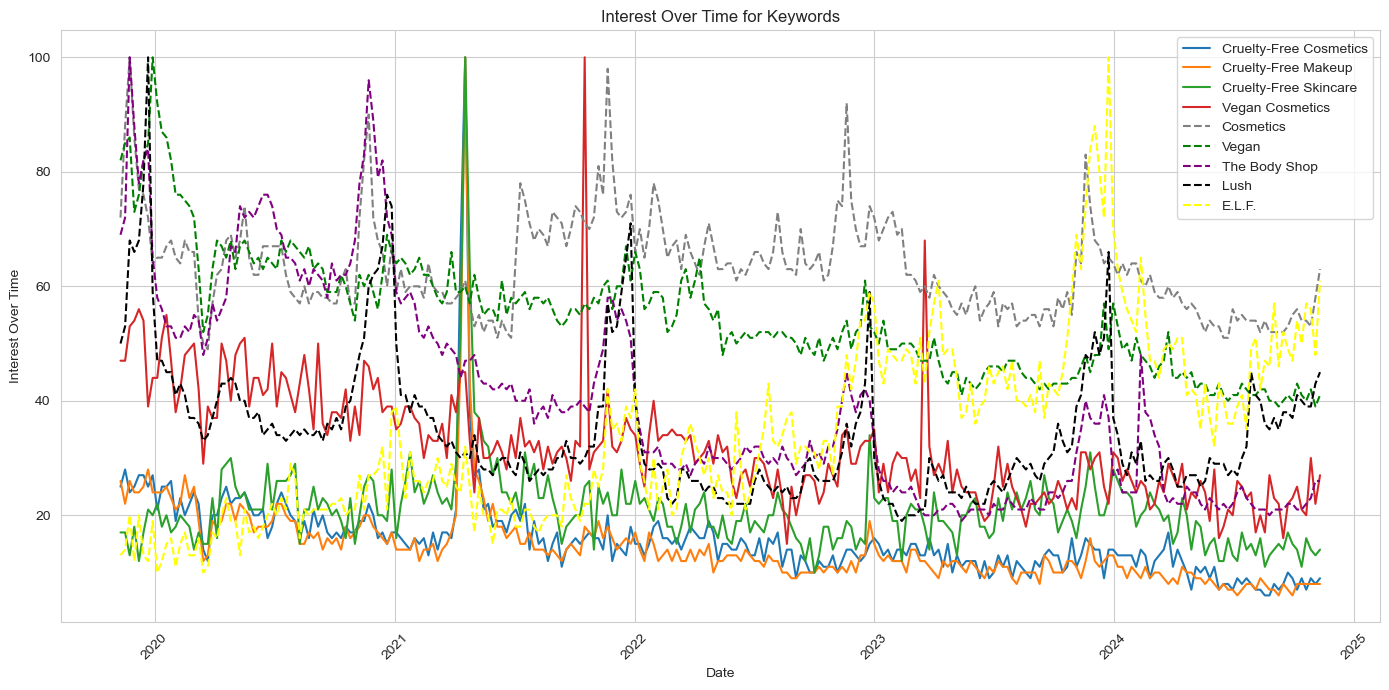

In [16]:
# Plot each keyword's interest over time
plt.figure(figsize=(14, 7))
plt.plot(df_merged['date'], df_merged['cruelty_free_cosmetics'], label='Cruelty-Free Cosmetics')
plt.plot(df_merged['date'], df_merged['cruelty_free_makeup'], label='Cruelty-Free Makeup')
plt.plot(df_merged['date'], df_merged['cruelty_free_skincare'], label='Cruelty-Free Skincare')
plt.plot(df_merged['date'], df_merged['vegan_cosmetics'], label='Vegan Cosmetics')
plt.plot(df_merged['date'], df_merged['cosmetics'], label='Cosmetics', linestyle='--', color='gray')
plt.plot(df_merged['date'], df_merged['vegan'], label='Vegan', linestyle='--', color='green')
plt.plot(df_merged['date'], df_merged['the_body_shop'], label='The Body Shop', linestyle='--', color='purple')
plt.plot(df_merged['date'], df_merged['lush'], label='Lush', linestyle='--', color='black')
plt.plot(df_merged['date'], df_merged['elf'], label='E.L.F.', linestyle='--', color='yellow')
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Interest Over Time for Keywords')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.3. Correlation Analysis

In [17]:
# Exclude the 'Date' column for correlation
correlation_matrix = df_merged.drop('date', axis=1).corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                        cruelty_free_cosmetics  cruelty_free_makeup  \
cruelty_free_cosmetics                1.000000             0.950215   
cruelty_free_makeup                   0.950215             1.000000   
cruelty_free_skincare                 0.761470             0.770236   
vegan_cosmetics                       0.504387             0.522070   
cosmetics                             0.215562             0.217303   
vegan                                 0.527761             0.558928   
the_body_shop                         0.460487             0.504069   
lush                                  0.203511             0.271491   
elf                                  -0.382534            -0.404679   

                        cruelty_free_skincare  vegan_cosmetics  cosmetics  \
cruelty_free_cosmetics               0.761470         0.504387   0.215562   
cruelty_free_makeup                  0.770236         0.522070   0.217303   
cruelty_free_skincare                1

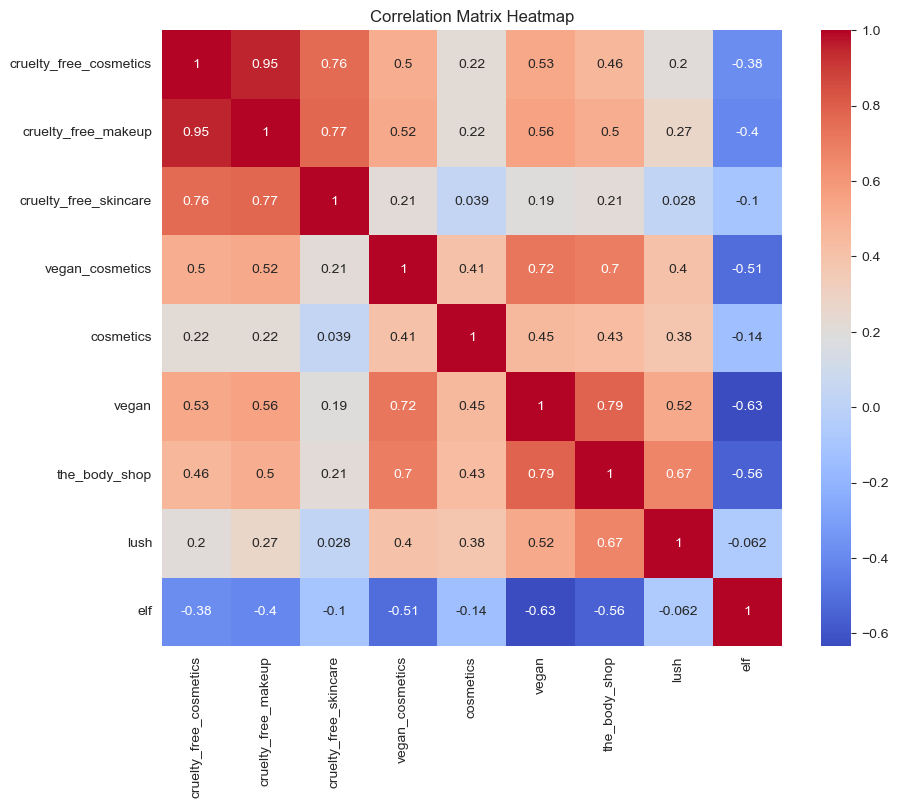

In [18]:
# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### 3.4. Distribution of Variables
Understanding the distribution can help in selecting appropriate models and transformations.

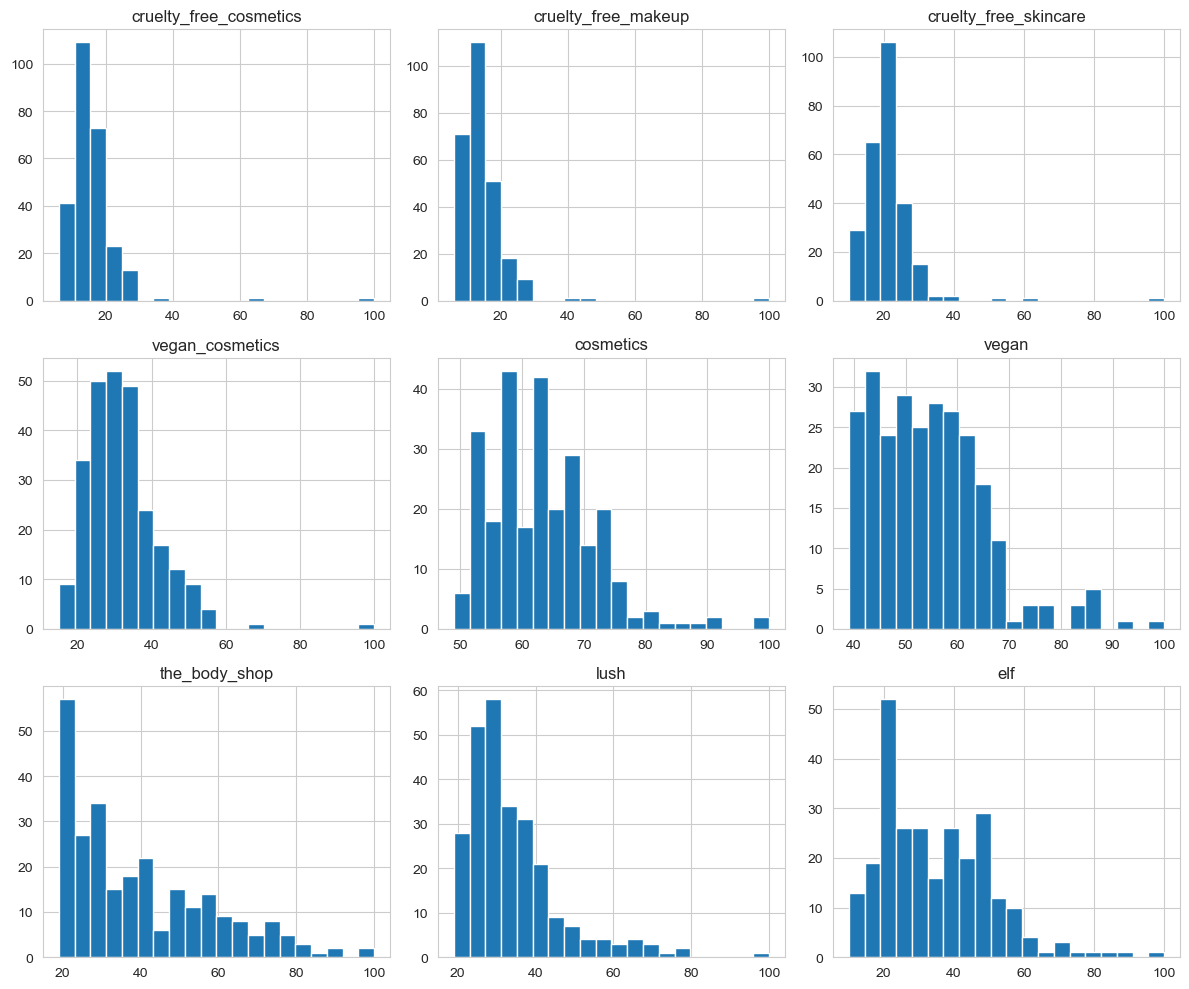

In [19]:
df_merged.drop('date', axis=1).hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


## 3.5. Seasonal Decomposition

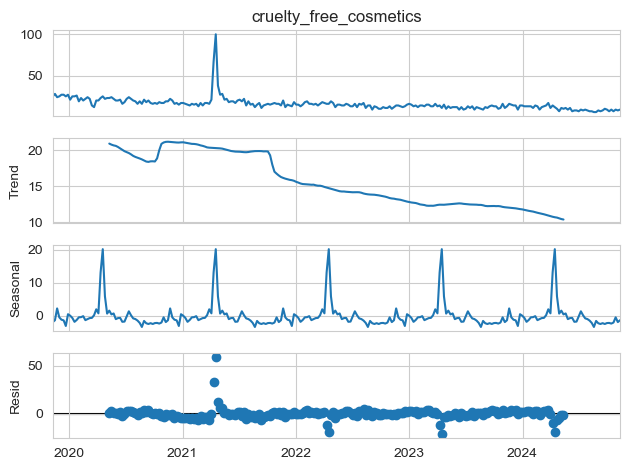

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' as the index
df_ts = df_merged.set_index('date')

# Perform decomposition (assuming weekly data with a yearly seasonality of 52 weeks)
decomposition = seasonal_decompose(df_ts['cruelty_free_cosmetics'], model='additive', period=52)

# Plot the decomposition
decomposition.plot()
plt.show()


## 3.6. Identify Key Events 

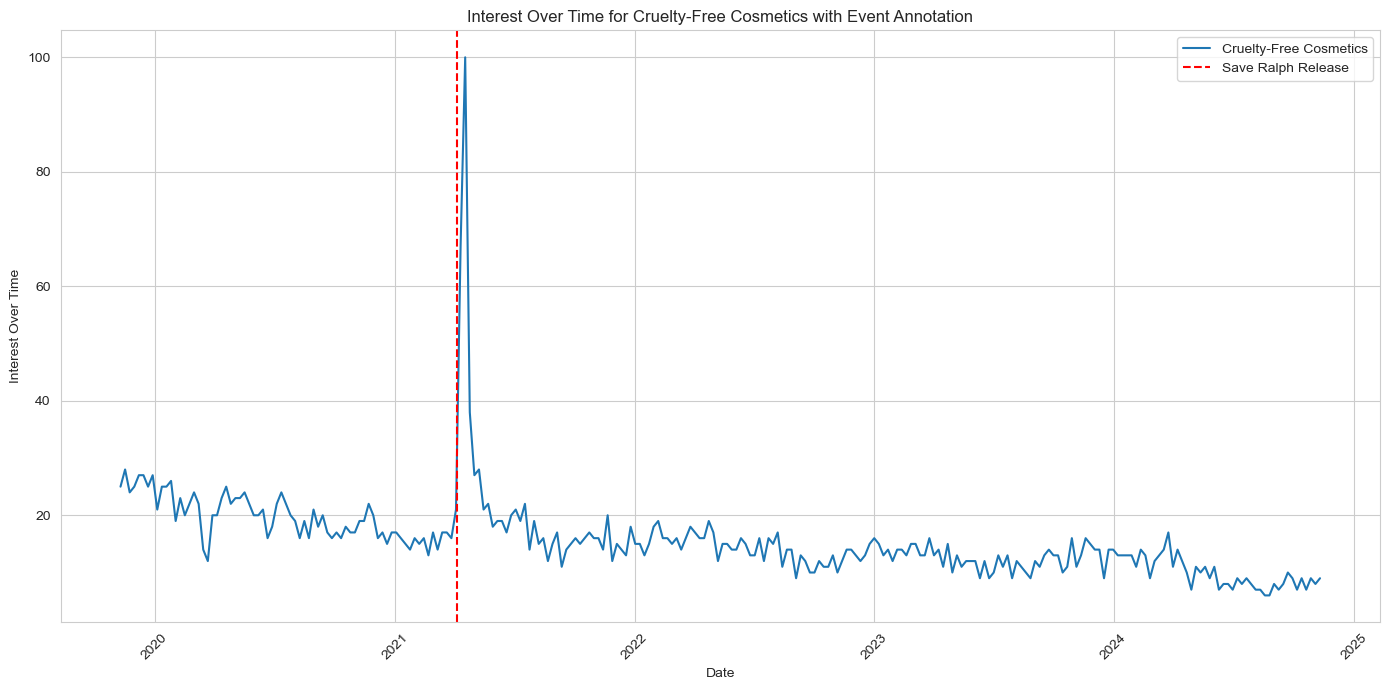

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df_merged['date'], df_merged['cruelty_free_cosmetics'], label='Cruelty-Free Cosmetics')

# Add a vertical line at the date of the event
event_date = pd.to_datetime('2021-04-06')
plt.axvline(x=event_date, color='red', linestyle='--', label='Save Ralph Release')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Interest Over Time for Cruelty-Free Cosmetics with Event Annotation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 4: Feature Engineering and Selection


In [23]:
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['week'] = df_merged['date'].dt.isocalendar().week

In [24]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df_merged['season'] = df_merged['month'].apply(get_season)

df_merged = pd.get_dummies(df_merged, columns=['season'])



In [25]:
df_merged['CFC_Lag1'] = df_merged['cruelty_free_cosmetics'].shift(1)
df_merged['CFC_Lag2'] = df_merged['cruelty_free_cosmetics'].shift(2)
df_merged['CFC_Lag3'] = df_merged['cruelty_free_cosmetics'].shift(3)

df_merged['Vegan_Cosmetics_Lag1'] = df_merged['vegan_cosmetics'].shift(1)

df_merged['CFC_RollingMean_3'] = df_merged['cruelty_free_cosmetics'].rolling(window=3).mean()
df_merged['CFC_RollingMean_6'] = df_merged['cruelty_free_cosmetics'].rolling(window=6).mean()

df_merged['CFC_Diff'] = df_merged['cruelty_free_cosmetics'].diff()

In [26]:
# Dates during which the campaign was most active
df_merged['Save_Ralph_Campaign'] = df_merged['date'].apply(
    lambda x: 1 if pd.to_datetime('2021-04-06') <= x <= pd.to_datetime('2021-05-31') else 0
)

df_merged.dropna(inplace=True)

## Log transformation

In [27]:
# Apply log transformation to the target variable before feature selection
df_merged['cruelty_free_cosmetics_log'] = np.log1p(df_merged['cruelty_free_cosmetics'])


In [28]:
# Define target variable
y = df_merged['cruelty_free_cosmetics_log']
#y = df_merged['vegan_cosmetics_log']
# Define features (exclude 'Date' and 'Cruelty_Free_Cosmetics')
feature_columns = df_merged.columns.difference(['date', 'cruelty_free_cosmetics_log'])
X = df_merged[feature_columns]

### 4.2 Feature Importance Using Random Forest

In [29]:
# Initialize and Train Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [31]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# Sort by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

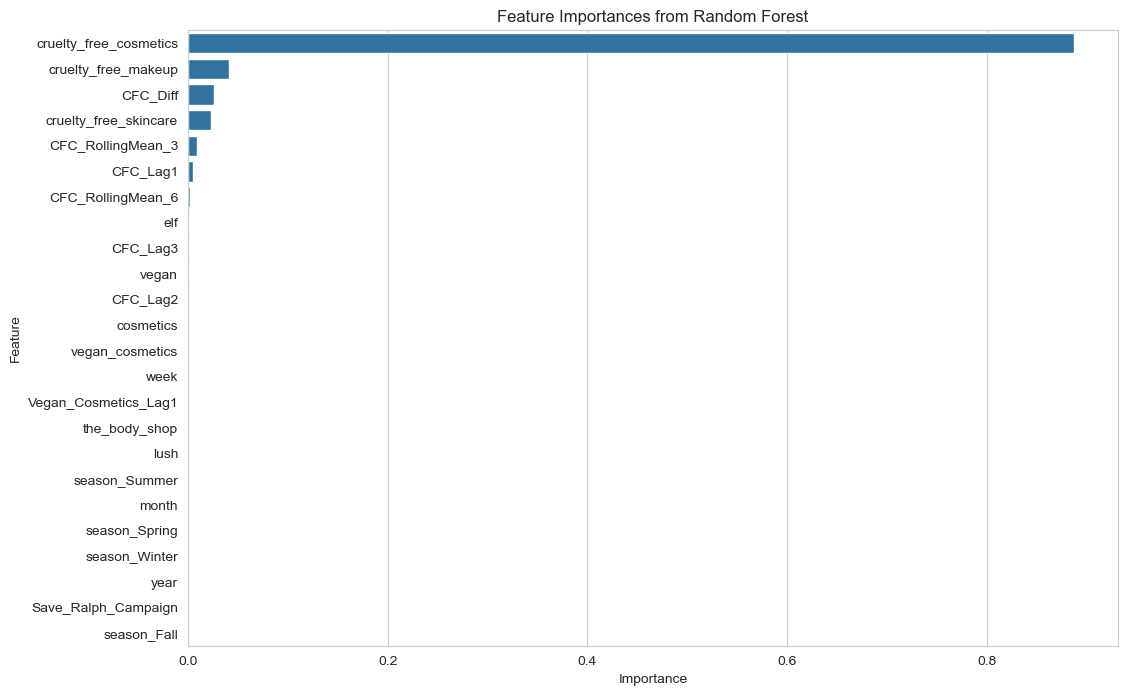

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

In [33]:
# Convert to DataFrame
df_fi = pd.DataFrame(feature_importances)

# Display the DataFrame
print(df_fi)

                   Feature    Importance
9   cruelty_free_cosmetics  8.871788e-01
10     cruelty_free_makeup  4.162802e-02
0                 CFC_Diff  2.628091e-02
11   cruelty_free_skincare  2.303703e-02
4        CFC_RollingMean_3  8.812754e-03
1                 CFC_Lag1  5.492568e-03
5        CFC_RollingMean_6  1.968006e-03
12                     elf  1.590416e-03
3                 CFC_Lag3  1.119153e-03
20                   vegan  6.093298e-04
2                 CFC_Lag2  5.374909e-04
8                cosmetics  4.569360e-04
21         vegan_cosmetics  3.785763e-04
22                    week  3.447015e-04
7     Vegan_Cosmetics_Lag1  2.481329e-04
19           the_body_shop  1.475206e-04
13                    lush  1.395723e-04
17           season_Summer  1.052980e-05
14                   month  1.013628e-05
16           season_Spring  3.706568e-06
18           season_Winter  2.489449e-06
23                    year  2.231854e-06
6      Save_Ralph_Campaign  9.554821e-07
15             s

In [34]:
# Select numeric features
X_numeric = X.select_dtypes(include=[np.number]).copy()

# Inspect data
print("Data Types:\n", X_numeric.dtypes)
print("\nMissing Values:\n", X_numeric.isnull().sum())
print("\nInfinite Values Present:", np.isinf(X_numeric).values.any())

# Replace infinite values with NaN
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)
X_numeric = X_numeric_imputed

# Ensure all data is float
X_numeric = X_numeric.astype(float)

# Verify no missing or infinite values remain
print("\nAfter Cleaning:")
print("Missing Values:\n", X_numeric.isnull().sum())
print("Infinite Values Present:", np.isinf(X_numeric).values.any())
print("Data Types:\n", X_numeric.dtypes)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_numeric.values, i) 
    for i in range(len(X_numeric.columns))
]

print("\nVIF Results:")
print(vif_data)

Data Types:
 CFC_Diff                  float64
CFC_Lag1                  float64
CFC_Lag2                  float64
CFC_Lag3                  float64
CFC_RollingMean_3         float64
CFC_RollingMean_6         float64
Save_Ralph_Campaign         int64
Vegan_Cosmetics_Lag1      float64
cosmetics                   int64
cruelty_free_cosmetics      int64
cruelty_free_makeup         int64
cruelty_free_skincare       int64
elf                         int64
lush                        int64
month                       int32
the_body_shop               int64
vegan                       int64
vegan_cosmetics             int64
week                       UInt32
year                        int32
dtype: object

Missing Values:
 CFC_Diff                  0
CFC_Lag1                  0
CFC_Lag2                  0
CFC_Lag3                  0
CFC_RollingMean_3         0
CFC_RollingMean_6         0
Save_Ralph_Campaign       0
Vegan_Cosmetics_Lag1      0
cosmetics                 0
cruelty_free_cosmetics 

c:\Users\npola\anaconda3\envs\ml-midproject\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## 4.4. Prepare Final Feature Set

In [35]:
selected_features = feature_importances['Feature'].tolist()
selected_features

['cruelty_free_cosmetics',
 'cruelty_free_makeup',
 'CFC_Diff',
 'cruelty_free_skincare',
 'CFC_RollingMean_3',
 'CFC_Lag1',
 'CFC_RollingMean_6',
 'elf',
 'CFC_Lag3',
 'vegan',
 'CFC_Lag2',
 'cosmetics',
 'vegan_cosmetics',
 'week',
 'Vegan_Cosmetics_Lag1',
 'the_body_shop',
 'lush',
 'season_Summer',
 'month',
 'season_Spring',
 'season_Winter',
 'year',
 'Save_Ralph_Campaign',
 'season_Fall']

In [36]:
# Create 'df_final' by selecting the chosen features
df_final = df_merged[selected_features]
df_final

,cruelty_free_cosmetics,cruelty_free_makeup,CFC_Diff,cruelty_free_skincare,CFC_RollingMean_3,CFC_Lag1,CFC_RollingMean_6,elf,CFC_Lag3,vegan,...,Vegan_Cosmetics_Lag1,the_body_shop,lush,season_Summer,month,season_Spring,season_Winter,year,Save_Ralph_Campaign,season_Fall
5,27,25,0.0,17,26.333333,27.0,26.000000,13,24.0,82,...,56.0,82,78,False,12,False,True,2019,0,False
6,25,28,-2.0,21,26.333333,27.0,26.000000,12,25.0,85,...,54.0,84,100,False,12,False,True,2019,0,False
7,27,24,2.0,20,26.333333,25.0,25.833333,19,27.0,100,...,39.0,65,59,False,12,False,True,2019,0,False
8,21,24,-6.0,22,24.333333,27.0,25.333333,10,27.0,92,...,44.0,58,47,False,1,False,True,2020,0,False
9,25,24,4.0,18,24.333333,21.0,25.333333,12,25.0,87,...,44.0,56,47,False,1,False,True,2020,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,9,8,2.0,11,8.333333,7.0,8.333333,50,10.0,41,...,25.0,21,40,False,10,False,False,2024,0,True
258,7,8,-2.0,16,7.666667,9.0,8.333333,57,9.0,40,...,21.0,22,39,False,10,False,False,2024,0,True
259,9,8,2.0,14,8.333333,7.0,8.500000,56,7.0,42,...,20.0,23,39,False,10,False,False,2024,0,True
260,8,8,-1.0,13,8.000000,9.0,8.166667,48,9.0,39,...,30.0,26,43,False,11,False,False,2024,0,True


In [37]:
# List of features with infinite VIFs
features_to_remove_inf = ['CFC_Diff', 'CFC_Lag1', 'CFC_Lag2', 'CFC_RollingMean_3','cruelty_free_cosmetics']

# Drop these features from df_final
df_final = df_final.drop(columns=features_to_remove_inf)

# Update the selected_features list
selected_features = [feature for feature in selected_features if feature not in features_to_remove_inf]

In [38]:
df_final.columns

Index(['cruelty_free_makeup', 'cruelty_free_skincare', 'CFC_RollingMean_6',
       'elf', 'CFC_Lag3', 'vegan', 'cosmetics', 'vegan_cosmetics', 'week',
       'Vegan_Cosmetics_Lag1', 'the_body_shop', 'lush', 'season_Summer',
       'month', 'season_Spring', 'season_Winter', 'year',
       'Save_Ralph_Campaign', 'season_Fall'],
      dtype='object')

In [39]:
max_vif_threshold = 10  # Define your acceptable VIF threshold

while True:
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_numeric.columns
    vif_data['VIF'] = [
        variance_inflation_factor(X_numeric.values, i) 
        for i in range(len(X_numeric.columns))
    ]
    
    max_vif = vif_data['VIF'].max()
    if max_vif > max_vif_threshold:
        feature_to_remove = vif_data.loc[vif_data['VIF'] == max_vif, 'Feature'].values[0]
        print(f"Removing '{feature_to_remove}' with VIF = {max_vif}")
        X_numeric = X_numeric.drop(columns=[feature_to_remove])
    else:
        print("All VIF values are below the threshold.")
        break

print("\nFinal VIF DataFrame:")
print(vif_data)

c:\Users\npola\anaconda3\envs\ml-midproject\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\npola\anaconda3\envs\ml-midproject\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing 'CFC_Diff' with VIF = inf
Removing 'CFC_Lag1' with VIF = inf
Removing 'CFC_RollingMean_3' with VIF = 239.0433010243741
Removing 'vegan' with VIF = 183.7066169900055
Removing 'CFC_RollingMean_6' with VIF = 107.66861102000865
Removing 'year' with VIF = 99.38087520478089
Removing 'cruelty_free_makeup' with VIF = 61.03275321766698
Removing 'cosmetics' with VIF = 51.68962683190058
Removing 'month' with VIF = 33.38942431621272
Removing 'cruelty_free_skincare' with VIF = 29.40807178578718
Removing 'the_body_shop' with VIF = 28.252518720302152
Removing 'Vegan_Cosmetics_Lag1' with VIF = 22.552114573205426
Removing 'vegan_cosmetics' with VIF = 19.729819142583096
Removing 'lush' with VIF = 16.010379879980754
Removing 'CFC_Lag2' with VIF = 10.933602585360045
All VIF values are below the threshold.

Final VIF DataFrame:
                  Feature       VIF
0                CFC_Lag3  5.045999
1     Save_Ralph_Campaign  1.463148
2  cruelty_free_cosmetics  5.315390
3                     elf  3

In [40]:
# Select features based on previous VIF analysis
selected_features = ['CFC_Lag3','Save_Ralph_Campaign','cruelty_free_cosmetics', 'elf', 'week']

In [41]:
X_final = X[selected_features]
len(X_final)

257

In [ ]:
# Prepare feature matrix and target vector
X_final = df_merged[selected_features]
y = df_merged['cruelty_free_cosmetics_log']

# Determine split index for 80% training data
split_fraction = 0.8
split_index = int(len(X_final) * split_fraction)  # 0.8 * 257 ≈ 206

# Split the data into training and testing sets
X_train = X_final.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X_final.iloc[split_index:]
y_test = y.iloc[split_index:]

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 205 rows
Test set size: 52 rows


## Step 5: Model Building and Evaluation
### 5.1 Linear Regression

In [ ]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")

### 5.2 Decision Tree Regressor

In [ ]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"R-squared (R²): {r2_dt:.2f}")

### 5.3 RandomForestRegressor

In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


## 5.4 XGBRegressor

In [ ]:
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print("\nXGBoost Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")

In [ ]:
# Create a DataFrame to compare models
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_xgb],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_xgb],
    'R_squared': [r2_lr, r2_dt, r2_rf, r2_xgb]
})

# Round the metrics for readability
performance_df['MSE'] = performance_df['MSE'].round(2)
performance_df['MAE'] = performance_df['MAE'].round(2)
performance_df['R_squared'] = performance_df['R_squared'].round(2)

print("\nModel Performance Comparison:")
print(performance_df)

### 5.5 Tune RandomForestRegressor
### GridSearchCV 

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


In [ ]:
print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)

In [ ]:
# Use the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print the results
print("\nTuned Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_best_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best_rf:.2f}")
print(f"R-squared (R²): {r2_best_rf:.2f}")

In [ ]:
# Create a new DataFrame for the new row
new_row = pd.DataFrame({
    'Model': ['Tuned Random Forest'],
    'MSE': [round(mse_best_rf, 2)],
    'MAE': [round(mae_best_rf, 2)],
    'R_squared': [round(r2_best_rf, 2)]
})

# Concatenate the new row to the existing DataFrame
performance_df = pd.concat([performance_df, new_row], ignore_index=True)

# Display the updated DataFrame
print("\nUpdated Model Performance Comparison:")
print(performance_df)

In [ ]:
# Define your features and target
X = df_merged[selected_features]  # Features you selected
y = df_merged['cruelty_free_cosmetics_log']  # Log-transformed target

# Initialize XGBoost regressor with regularization parameters
xgboost = XGBRegressor(
    learning_rate=0.05,  # Set the learning rate
    max_depth=3,  # Set the depth of trees
    n_estimators=300,  # Number of boosting rounds
    reg_alpha=0.1,  # L1 regularization (Lasso)
    reg_lambda=0.1,  # L2 regularization (Ridge)
    subsample=0.8,  # Fraction of samples to use for each boosting round
    colsample_bytree=0.8,  # Fraction of features to use for each tree
    random_state=42  # For reproducibility
)

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, 
                          cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the performance of the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"MSE: {mse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R²: {r2_best:.2f}")


## 6. Residual analysis 

In [ ]:
# Use the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_train)
residuals = y_train - y_pred_best_rf

In [ ]:
# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)
residuals = y_train - y_pred


In [ ]:
# Make predictions on the training set
y_pred_rf = rf_model.predict(X_train)
# Calculate residuals for the training set
residuals = y_train - y_pred_rf

# Calculate residuals
#residuals = y_test - y_pred_lr

In [ ]:
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_train)
# Calculate residuals for the training set
residuals = y_train - y_pred_xgb

In [ ]:
# Residuals on Training Data
y_pred_train = dt_model.predict(X_train)
residuals_train = y_train - y_pred_train
print("Residuals (Train):")
print(residuals_train.head())

In [ ]:
 # Train the model
dt_model.fit(X_train, y_train) # Make predictions on the test set
y_pred_dt = dt_model.predict(X_train)
residuals = y_train - y_pred_dt

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [ ]:
# Display summary statistics
residual_summary = residuals.describe()
print("Residuals Summary Statistics:")
print(residual_summary)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_stat:.2f}")

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate the ACF plot for residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk Test p-value: {shapiro_p:.4f}")

In [ ]:
import statsmodels.api as sm

# Assuming X_train is your independent variables DataFrame
X_train_sm = sm.add_constant(X_train)

# Verify the addition of the constant
print("Columns in X_train_sm:")
print(X_train_sm.columns)

In [ ]:
# Check the shapes of X_train and y_train
print(f"Number of rows in X_train: {X_test.shape[0]}")
print(f"Number of rows in y_train: {y_train.shape[0]}")

In [ ]:
print(f"Number of residuals: {len(residuals)}")
print(f"Number of rows in X_train_sm: {X_train_sm.shape[0]}")

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'residuals' are your residuals from the regression model
# and 'X_train_sm' is your exogenous variables with the constant

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_train_sm)

# Extract test results
bp_stat = bp_test[0]
bp_pvalue = bp_test[1]
bp_fvalue = bp_test[2]
bp_f_pvalue = bp_test[3]

print(f"Breusch-Pagan Test Statistic: {bp_stat:.4f}")
print(f"Breusch-Pagan Test p-value: {bp_pvalue:.4f}")
print(f"Breusch-Pagan F-Statistic: {bp_fvalue:.4f}")
print(f"Breusch-Pagan F-Test p-value: {bp_f_pvalue:.4f}")

In [ ]:
# Check data types of X_train_sm
print("Data types in X_train_sm:")
print(X_train_sm.dtypes)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Create a temporary copy of X_train_sm
X_train_temp = X_train_sm.copy()

# Convert 'week' from UInt32 to float64 in the temporary copy
X_train_temp['week'] = X_train_temp['week'].astype('float64')

# Verify the conversion
print("Data types in temporary X_train_temp:")
print(X_train_temp.dtypes)


In [ ]:
# Obtain influence measures from the temporary model
influence_temp = OLSInfluence(ols_model_temp)
cooks_d_temp, p_values_temp = influence_temp.cooks_distance

# Define a threshold for identifying influential points (commonly 4/N)
N = len(X_train_temp)
threshold = 4 / N

# Identify indices of influential observations
influential_points_temp = np.where(cooks_d_temp > threshold)[0]

print(f"Number of Influential Observations: {len(influential_points_temp)}")
print(f"Indices of Influential Observations: {influential_points_temp}")


In [ ]:
import matplotlib.pyplot as plt

# Plot Cook's Distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks_d_temp)), cooks_d_temp, markerfmt=",")
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.legend()
plt.show()

In [ ]:
# Obtain influence measures from the temporary model
influence_temp = OLSInfluence(ols_model_temp)
cooks_d_temp, p_values_temp = influence_temp.cooks_distance

# Define a threshold for identifying influential points (commonly 4/N)
N = len(X_train_temp)
threshold = 4 / N

# Identify indices of influential observations
influential_points_temp = np.where(cooks_d_temp > threshold)[0]

print(f"Number of Influential Observations: {len(influential_points_temp)}")
print(f"Indices of Influential Observations: {influential_points_temp}")


In [ ]:
# Prepare feature matrix and target vector
X_final = df_merged[selected_features]
y = df_merged['cruelty_free_cosmetics']

# Initial model fit
model = LinearRegression()
model.fit(X_final, y)
y_pred = model.predict(X_final)

# Calculate residuals
residuals = y - y_pred

# Standardized residuals
mean_resid = np.mean(residuals)
std_resid = np.std(residuals)
standardized_residuals = (residuals - mean_resid) / std_resid

# Remove outliers
threshold = 2
outlier_indices = standardized_residuals[np.abs(standardized_residuals) > threshold].index
X_cleaned = X_final.drop(index=outlier_indices)
y_cleaned = y.drop(index=outlier_indices)

# Re-fit model on cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_cleaned, y_cleaned)
y_pred_cleaned = model_cleaned.predict(X_cleaned)

# Residuals of cleaned model
residuals_cleaned = y_cleaned - y_pred_cleaned

# Shapiro-Wilk test
stat, p_value = shapiro(residuals_cleaned)
print('Shapiro-Wilk Test Statistic (Cleaned Data):', round(stat, 4))
print('Shapiro-Wilk Test p-value (Cleaned Data):', round(p_value, 4))

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals_cleaned, kde=True, bins=30, edgecolor='k')
plt.title('Histogram of Residuals (After Removing Outliers)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# QQ-Plot
stats.probplot(residuals_cleaned, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals (After Removing Outliers)')
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_cleaned, y_pred_cleaned)
mae = mean_absolute_error(y_cleaned, y_pred_cleaned)
r_squared = r2_score(y_cleaned, y_pred_cleaned)

print('Mean Squared Error (Cleaned Data):', round(mse, 4))
print('Mean Absolute Error (Cleaned Data):', round(mae, 4))
print('R-squared (Cleaned Data):', round(r_squared, 4))
